In [9]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [10]:
#Import csv
eth_data = pd.read_csv("C:/Users/Werner Soon Shi Xu/Documents/Ethereum Sentiment Data.csv", encoding='latin1')
eth_data.head()

,Title,Description,Date & Time,Date,ETH Price Start of Day,ETH Price End of Next Day,Change %,Negative,Neutral,Positive,Compound,Combined_Text,Vol. Day 1 (Thousands),Vol. Day 2 (Thousands),Total Vol.,Chang in Vol %
0,"Bitcoin (BTC) Drops Below $60,000, Ethereum (E...",U.Today - The Bitcoin roller coaster has taken...,"04/18/2024, 08:30 PM",04/18/2024,2985.82,3056.23,2.358146,0.080,0.808,0.111,0.9790,"Bitcoin (BTC) Drops Below $60,000, Ethereum (E...",423.99,645.65,1069.64,52.279535
1,New report shows 42% QoQ surge in stablecoin u...,A fresh industry report by QuickNode and Artem...,"04/17/2024, 09:31 AM",04/17/2024,3083.42,3064.48,-0.614253,0.008,0.849,0.144,0.9967,New report shows 42% QoQ surge in stablecoin u...,524.88,423.99,948.87,-19.221536
2,P2P.org introduces DVT-powered restaking solut...,Non-custodial staking service P2P.org plans to...,"04/17/2024, 06:19 AM",04/17/2024,3083.42,3064.48,-0.614253,0.019,0.854,0.127,0.9905,P2P.org introduces DVT-powered restaking solut...,524.88,423.99,948.87,-19.221536
3,Bitcoin price today: Down to $63k amid rate fe...,&copy; Reuters. \nInvesting.com-- Bitcoin pri...,"04/16/2024, 01:39 AM",04/16/2024,3100.98,2985.42,-3.726564,0.106,0.779,0.115,0.8687,Bitcoin price today: Down to $63k amid rate fe...,560.47,524.88,1085.35,-6.350028
4,Ethereum vs. Bitcoin: Is 60% ETH Price Collaps...,"U.Today - Benjamin Cowen, a crypto analyst and...","04/16/2024, 11:42 AM",04/16/2024,3100.98,2985.42,-3.726564,0.093,0.826,0.081,-0.5822,Ethereum vs. Bitcoin: Is 60% ETH Price Collaps...,560.47,524.88,1085.35,-6.350028


In [12]:
#Create new dataframe with Date, Change in Price %, Change in Vol %, Avg. Positive, Avg. Neutral, Avg. Negative, Avg. Compound

# Filter out non-numeric columns
numeric_columns = eth_data.select_dtypes(include=['number']).columns

# Group by 'date' column and calculate average values for each group
average_values = eth_data.groupby('Date')[numeric_columns].mean()

# Create a new DataFrame to store the average values
clean_eth_data = pd.DataFrame(average_values)

# Print the new DataFrame
print(clean_eth_data)


              Change %  Negative   Neutral  Positive  Compound  \
Date                                                             
 01/29/2024   3.818921  0.041435  0.852000  0.106652  0.920161   
 01/30/2024  -1.494959  0.042400  0.849480  0.108280  0.926216   
 01/31/2024  -1.657199  0.047722  0.835222  0.117222  0.974444   
 02/01/2024   1.144914  0.041182  0.850591  0.108409  0.921391   
 02/02/2024  -0.337633  0.043783  0.846304  0.110043  0.920965   
 02/03/2024  -0.844419  0.044625  0.843500  0.111958  0.943275   
 02/04/2024   0.232092  0.046750  0.846000  0.107292  0.906308   
 02/05/2024   3.619125  0.040593  0.848926  0.110630  0.933111   
 02/06/2024   5.335320  0.053909  0.833455  0.112727  0.931755   
 02/12/2024   5.322158  0.027000  0.913000  0.060000  0.901100   
 02/13/2024   4.409856  0.028000  0.897000  0.075000  0.774500   
 02/29/2024   1.493654  0.034000  0.870000  0.097000  0.953800   
 03/04/2024   1.930822  0.022500  0.855500  0.122000  0.932850   
 03/15/202

<Axes: >

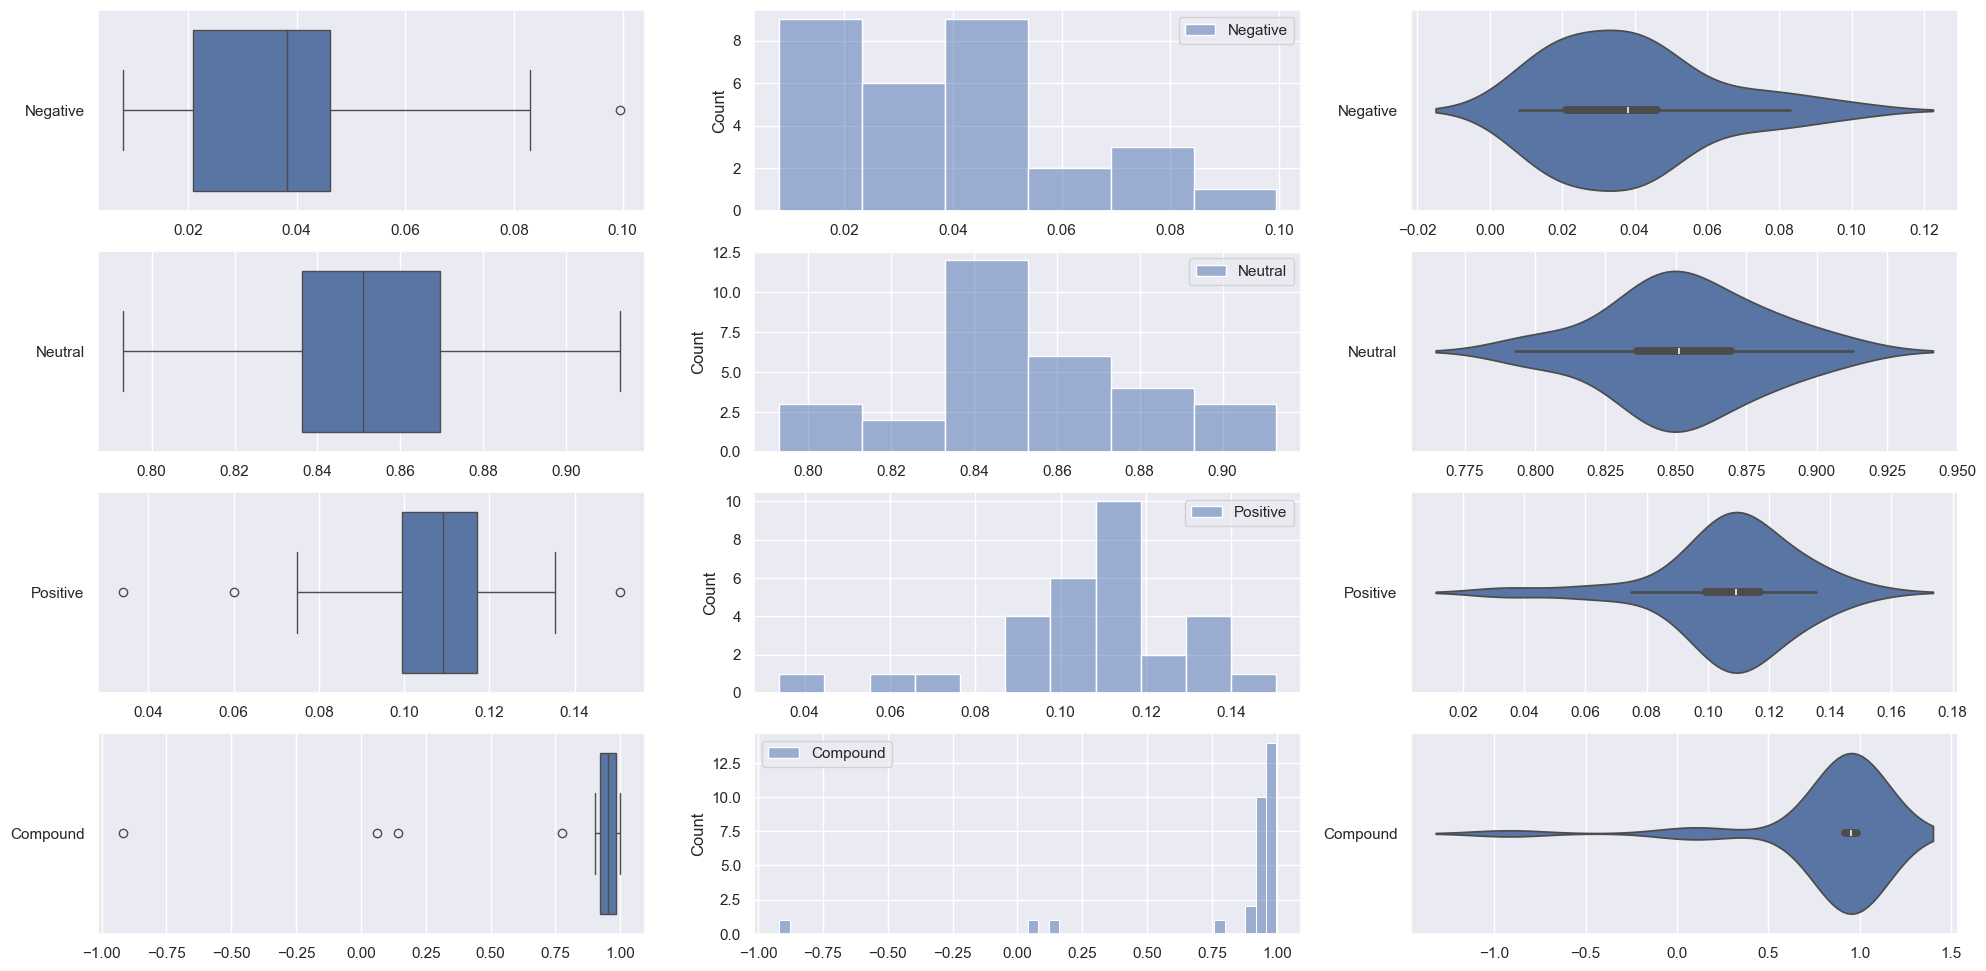

In [16]:
#Plot boxplot, histplot, violinplot
neg = pd.DataFrame(clean_eth_data['Negative'])
neu = pd.DataFrame(clean_eth_data['Neutral'])
pos = pd.DataFrame(clean_eth_data['Positive'])
com = pd.DataFrame(clean_eth_data['Compound'])

change_pri = pd.DataFrame(clean_eth_data['Change %'])
change_vol = pd.DataFrame(clean_eth_data['Chang in Vol %'])

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(4, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for neg
sb.boxplot(data = neg, orient = "h", ax = axes[0,0])
sb.histplot(data = neg, ax = axes[0,1])
sb.violinplot(data = neg, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for neu
sb.boxplot(data = neu, orient = "h", ax = axes[1,0])
sb.histplot(data = neu, ax = axes[1,1])
sb.violinplot(data = neu, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for pos
sb.boxplot(data = pos, orient = "h", ax = axes[2,0])
sb.histplot(data = pos, ax = axes[2,1])
sb.violinplot(data = pos, orient = "h", ax = axes[2,2])

# Plot the basic uni-variate figures for com
sb.boxplot(data = com, orient = "h", ax = axes[3,0])
sb.histplot(data = com, ax = axes[3,1])
sb.violinplot(data = com, orient = "h", ax = axes[3,2])

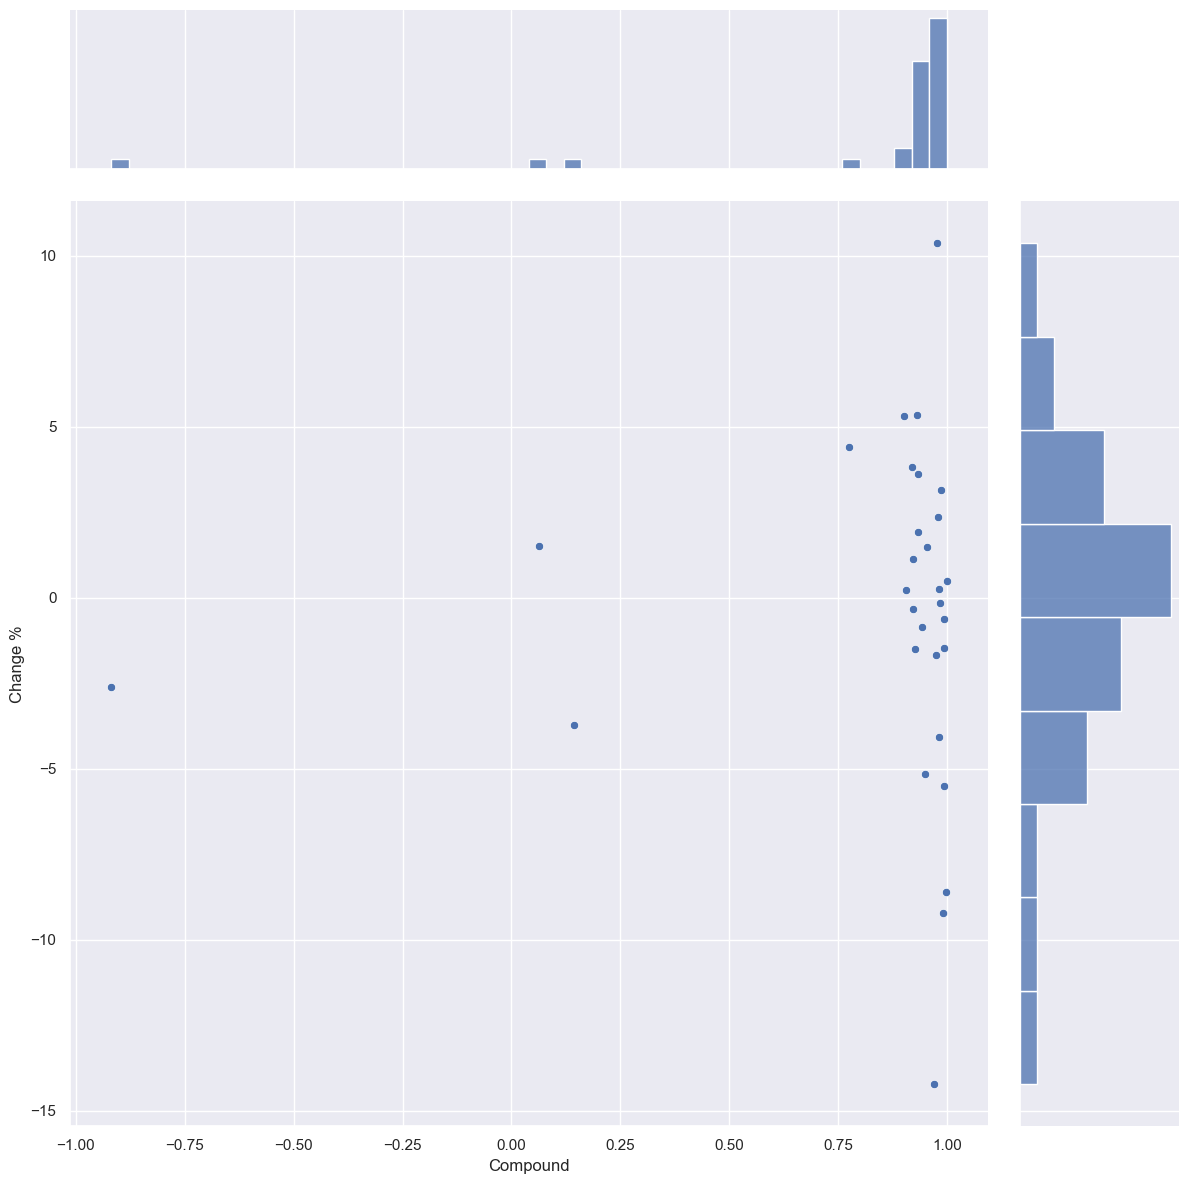

In [22]:
#Plot Avg. Compound against Change in Price %
trainDF1 = pd.concat([com, change_pri], axis = 1).reindex(com.index)

sb.jointplot(data = trainDF1, x = "Compound", y = "Change %", height = 12)

<Axes: >

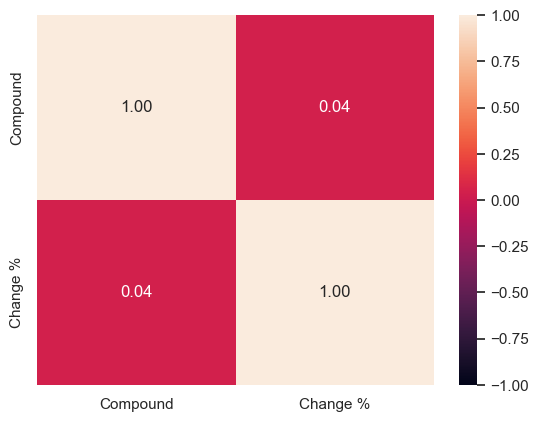

In [23]:
sb.heatmap(trainDF1.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

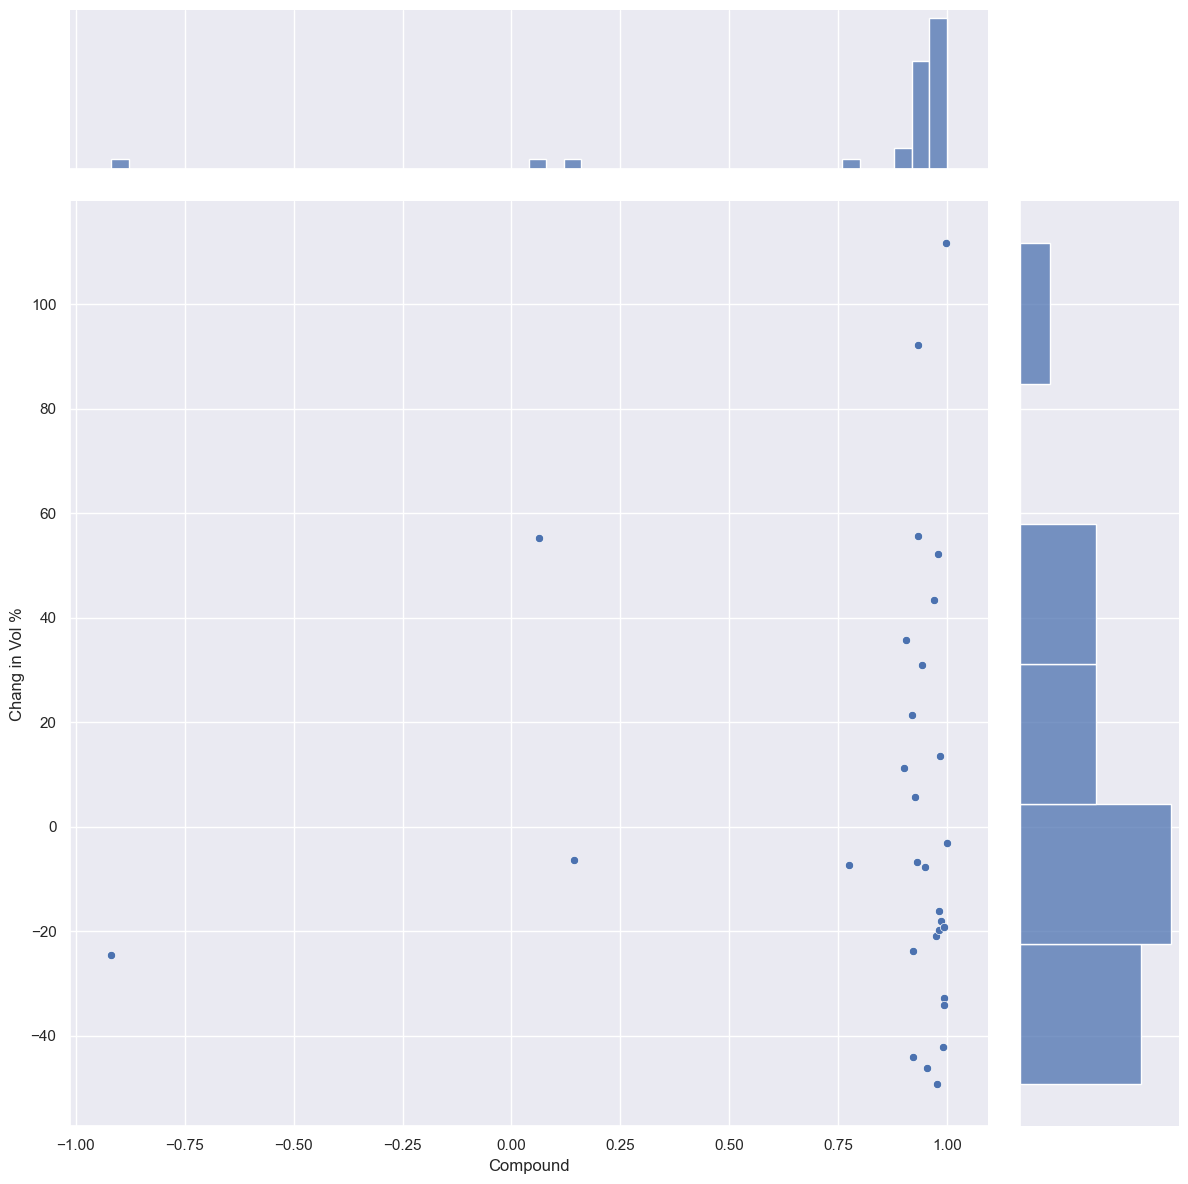

In [24]:
#Plot Avg. Compound against Change in Volume %
trainDF2 = pd.concat([com, change_vol], axis = 1).reindex(com.index)

sb.jointplot(data = trainDF2, x = "Compound", y = "Chang in Vol %", height = 12)

<Axes: >

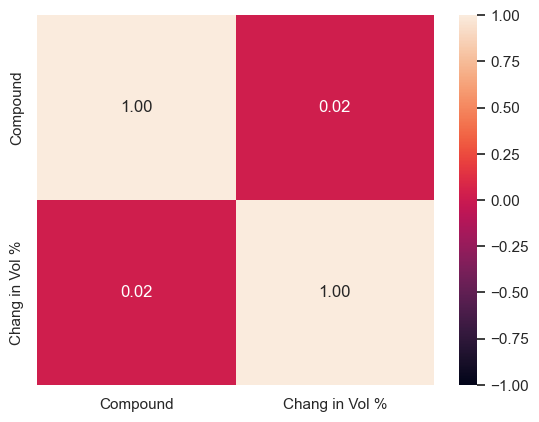

In [25]:
sb.heatmap(trainDF2.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

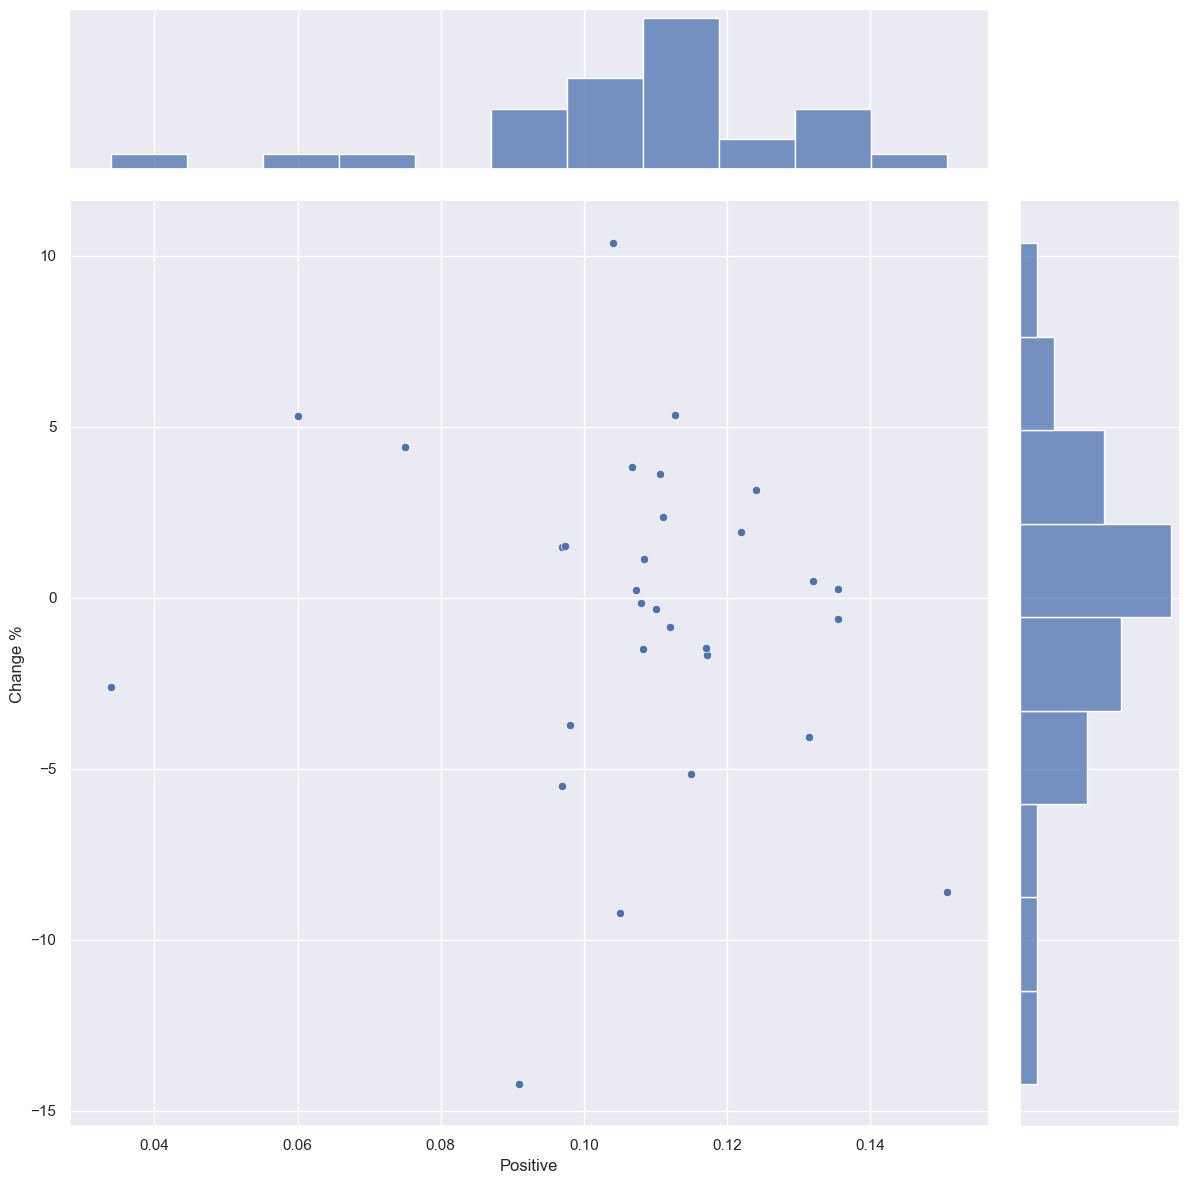

In [26]:
#Plot Avg. Positive against Change in Price %
trainDF3 = pd.concat([pos, change_pri], axis = 1).reindex(pos.index)

sb.jointplot(data = trainDF3, x = "Positive", y = "Change %", height = 12)

<Axes: >

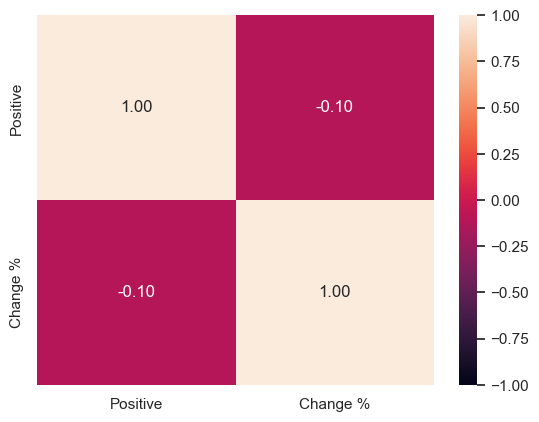

In [27]:
sb.heatmap(trainDF3.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

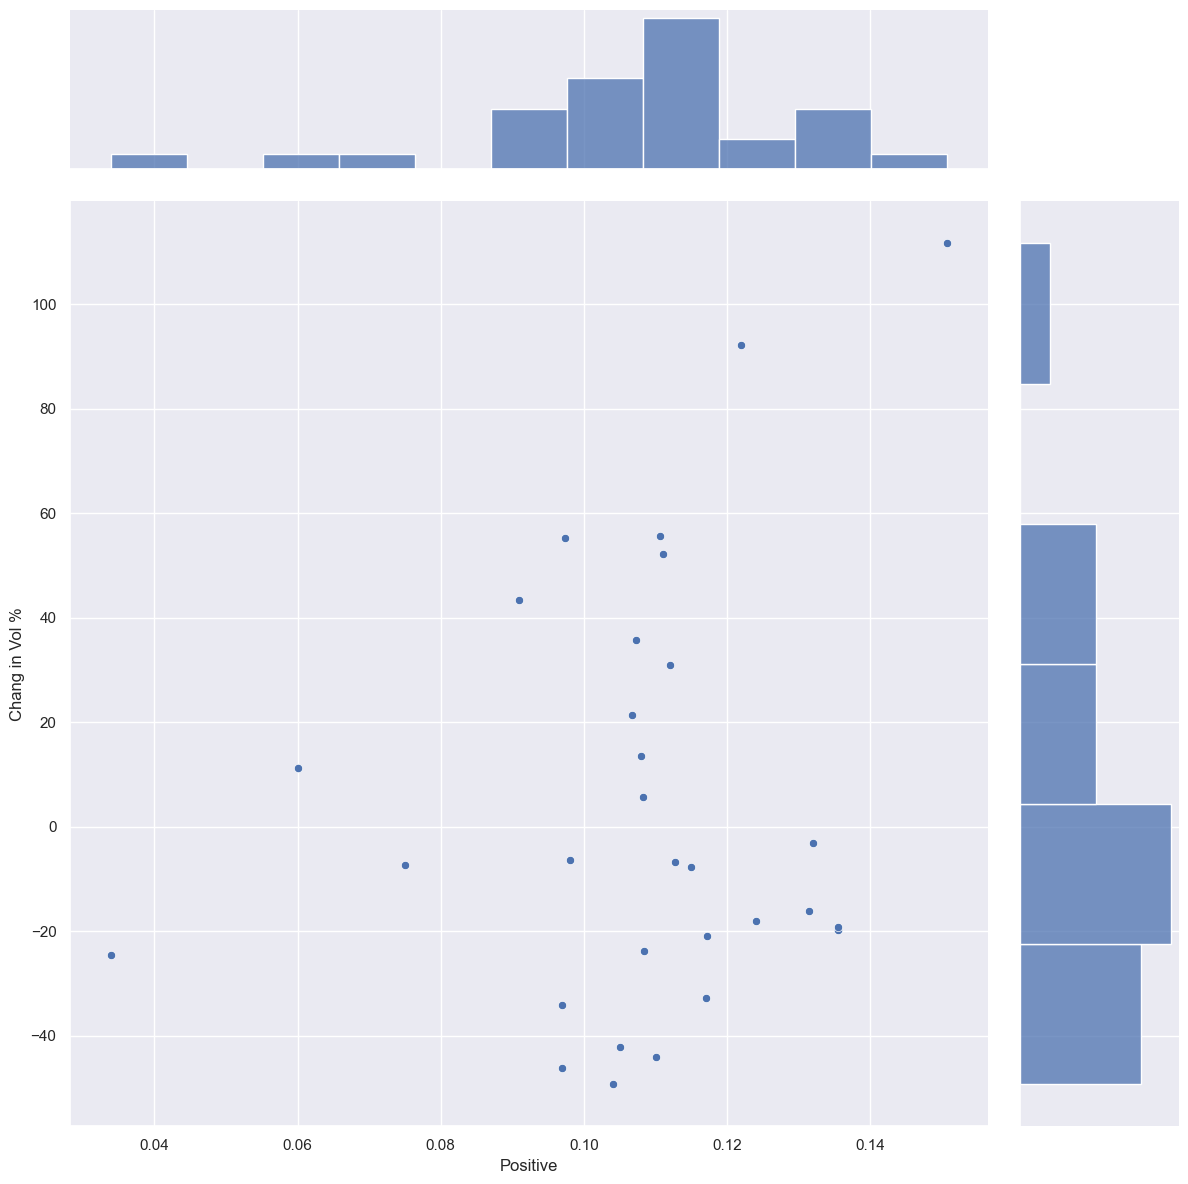

In [28]:
#Plot Avg. Positive against Change in Vol %
trainDF4 = pd.concat([pos, change_vol], axis = 1).reindex(pos.index)

sb.jointplot(data = trainDF4, x = "Positive", y = "Chang in Vol %", height = 12)

<Axes: >

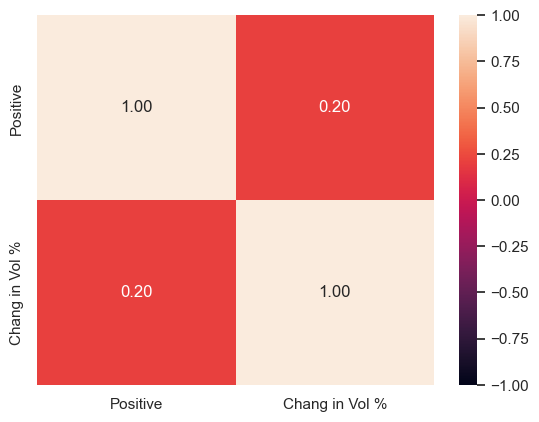

In [29]:
sb.heatmap(trainDF4.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

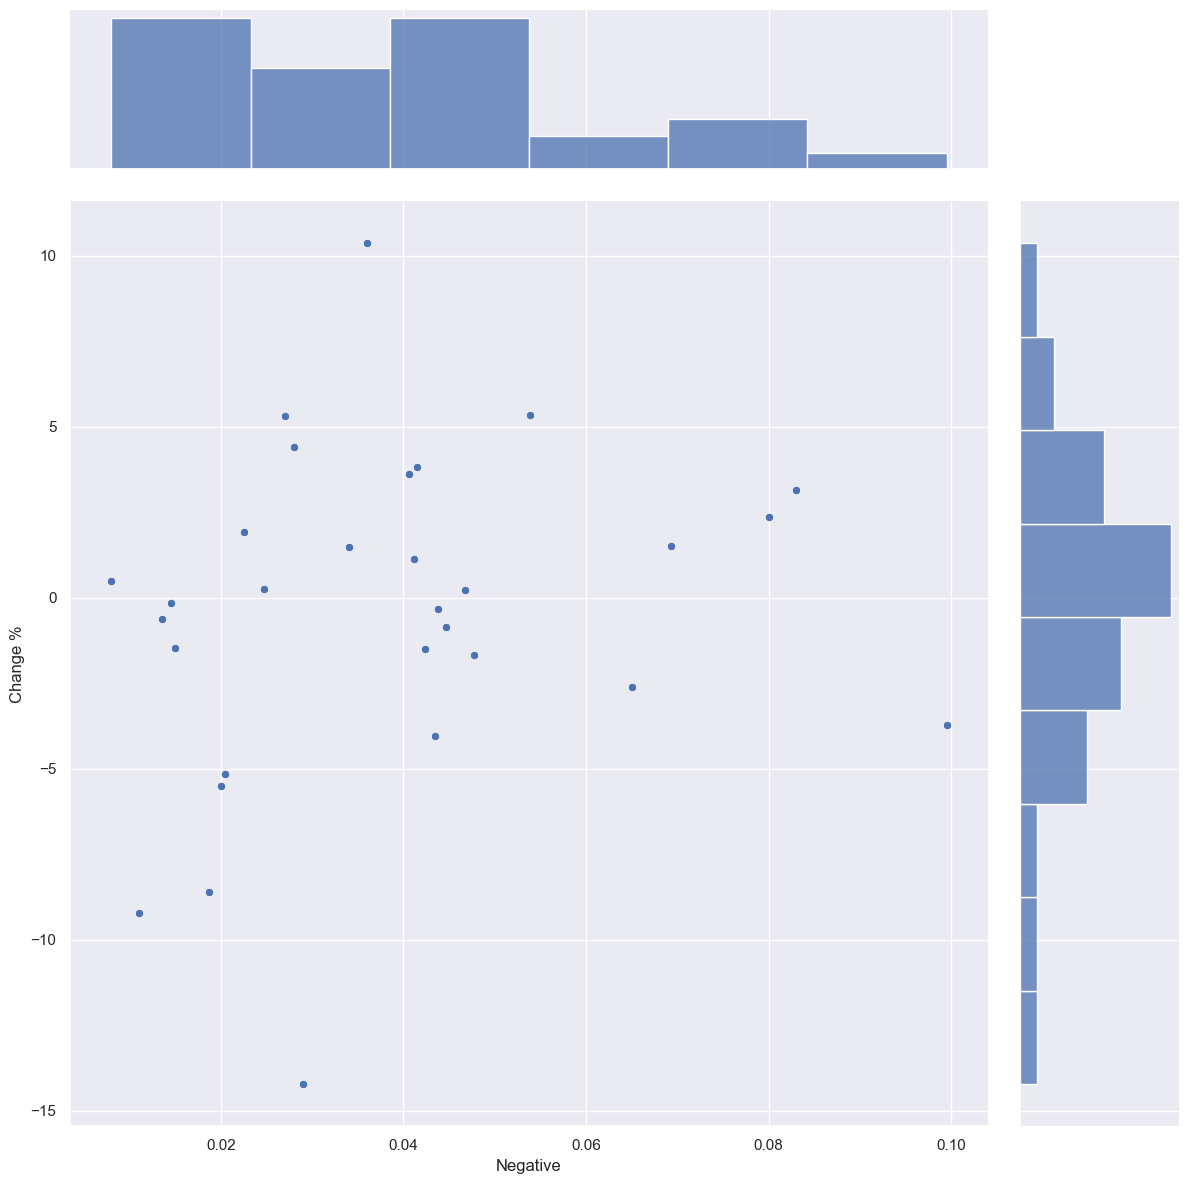

In [30]:
#Plot Avg. Negative against Change in Price %
trainDF5 = pd.concat([neg, change_pri], axis = 1).reindex(neg.index)

sb.jointplot(data = trainDF5, x = "Negative", y = "Change %", height = 12)

<Axes: >

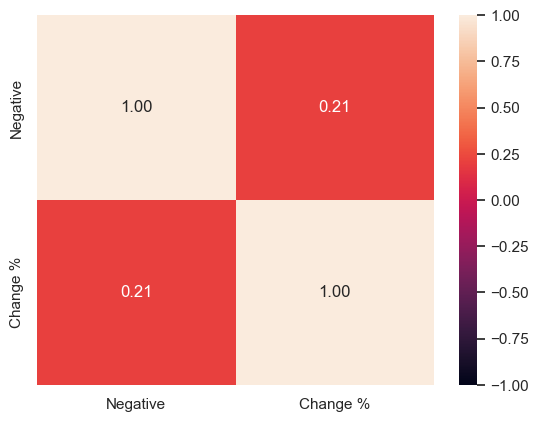

In [31]:
sb.heatmap(trainDF5.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

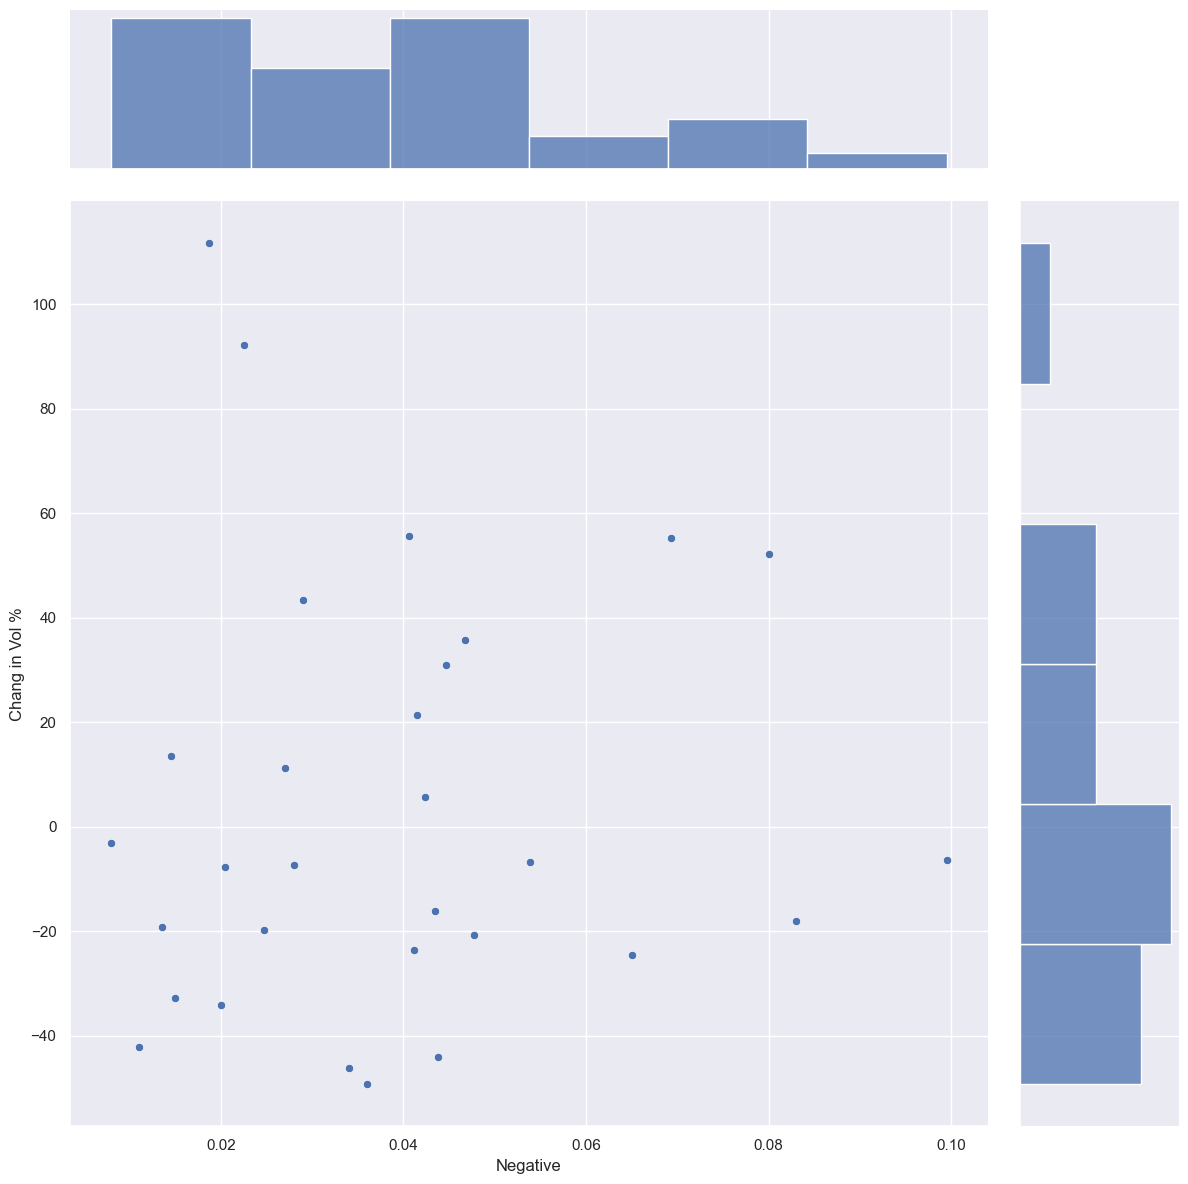

In [33]:
#Plot Avg. Negative against Change in Vol %
trainDF6 = pd.concat([neg, change_vol], axis = 1).reindex(neg.index)

sb.jointplot(data = trainDF6, x = "Negative", y = "Chang in Vol %", height = 12)

<Axes: >

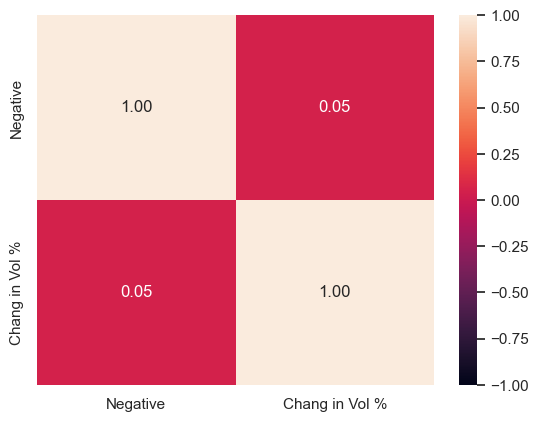

In [34]:
sb.heatmap(trainDF6.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [ ]:
#Decide if correlation is high enough to proceed for any variable
#Since all of the correlation values are low (< 0.22), we conclude that using the sentiment values of articles found in investing.com about Ethereum
#calculated using VADER is not a good predictor of future Ethereum price or trading volume

#This means that news sources are not as important when trading ethereum, so we should not trade based off news sources